# Logistic Regression from Scratch for the Titanic Dataset

Logistic regression is a widely used machine learning algorithm for binary classification problems. For the Titanic dataset, it is commonly applied to predict whether a passenger survived or not based on various features such as age, gender, passenger class, etc.

## Objective

The goal is to implement logistic regression from scratch (without using prebuilt libraries like Scikit-learn for the model) to predict the survival (Survived) of passengers in the Titanic dataset. The target variable (Survived) is binary:

- 1: The passenger survived.
- 0: The passenger did not survive.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:

x_train = pd.read_csv('train_X.csv')
x_test = pd.read_csv('test_X.csv')
y_train = pd.read_csv('train_Y.csv')
y_test = pd.read_csv('test_Y.csv')

In [16]:
x_train = x_train.drop('Id',axis = 1)
x_test = x_test.drop('Id',axis = 1)
y_train = y_train.drop('Id',axis = 1)
y_test = y_test.drop('Id',axis = 1)

<h3>The Conversion to NumPy Arrays: A Crucial Step in Implementing Logistic Regression (or Any Machine Learning Algorithm) From Scratch</h3>

<p>Converting data to NumPy arrays is an essential step when implementing logistic regression or any other machine learning algorithm from scratch. Here’s why this conversion is necessary and why we don’t work directly with the original data structures (like pandas DataFrames):</p>

<h3>1. Why Convert to NumPy Arrays?</h3>

<h4>a. Computational Efficiency:</h4>
<ul>
  <li><b>Optimized Calculations:</b> NumPy is optimized for numerical computations and matrix operations.</li>
  <li><b>Speed:</b> Operations on NumPy arrays are significantly faster than on pandas DataFrames, especially when dealing with large matrices.</li>
  <li><b>Example:</b> Matrix multiplication, additions, and other mathematical operations are highly optimized in NumPy.</li>
</ul>

<h4>b. Compatibility with Mathematical Operations:</h4>
<ul>
  <li><b>Complex Operations:</b> Machine learning algorithms often involve complex mathematical operations (e.g., matrix multiplications, gradient calculations, etc.).</li>
  <li><b>Native Functions:</b> NumPy provides native functions for these operations, such as <code>np.dot()</code> for matrix multiplication, <code>np.sum()</code> for summation, and more.</li>
  <li><b>Limitation of pandas:</b> pandas DataFrames are not designed for such low-level mathematical operations.</li>
</ul>


In [17]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

<h2>Explanation of Data Preprocessing Steps</h2>

<p>This code performs the following operations:</p>

<h3>1. Transposes <code>x_train</code> and <code>x_test</code>:</h3>
<ul>
  <li>The <code>.T</code> operation swaps the rows and columns of the matrices.</li>
  <li>If <code>x_train</code> originally has a shape of <code>(n_samples, n_features)</code>, after transposition, it will have a shape of <code>(n_features, n_samples)</code>. The same applies to <code>x_test</code>.</li>
</ul>

<h3>2. Reshapes <code>y_train</code> and <code>y_test</code>:</h3>
<ul>
  <li>The <code>.reshape(1, x_train.shape[1])</code> operation converts <code>y_train</code> and <code>y_test</code> into row vectors with a shape of <code>(1, n_samples)</code>.</li>
  <li>This ensures that the target labels (<code>y_train</code> and <code>y_test</code>) are in a compatible format for matrix operations, particularly when calculating predictions and gradients during training or evaluation.</li>
</ul>

<h3>Summary:</h3>
<p>This code prepares the input data (<code>x_train</code>, <code>x_test</code>) and target labels (<code>y_train</code>, <code>y_test</code>) for use in a machine learning model by ensuring the dimensions are aligned correctly for matrix operations.</p>


In [18]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.reshape(1,x_train.shape[1])
y_test = y_test.reshape(1,x_test.shape[1])

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7, 891)
(1, 891)
(7, 418)
(1, 418)


# Logistic Regression Overview

## Key Concepts

Below are the key components of logistic regression:

1. **Sigmoid Function, Cost Function, and Gradient Descent** (Left)
2. **Logistic Regression Equations** (Right)

<table>
    <tr>
        <td align="center">
            <strong>Sigmoid Function and Cost Function</strong><br>
            <img src="image.png" alt="Sigmoid Function" style="width: 400px;">
        </td>
        <td align="center">
            <strong>Logistic Regression Equations</strong><br>
            <img src="image2.png" alt="Logistic Regression Equations" style="width: 400px;">
        </td>
    </tr>
</table>


In [20]:
def segmoid(x):
    return 1/(1+np.exp(-x))

In [21]:
def model(x,y,ite,lr):
    m = x.shape[1]
    n = x.shape[0]

    w = np.zeros((n,1))
    b=0

    cost_list = []

    for i in range(ite):
        z = np.dot(w.T,x)+b
        a = segmoid(z)

        cost = (-1/m)*np.sum(y*np.log(a)+(1-y)*np.log(1-a))

        dw = (1/m)*np.dot(a-y,x.T)
        db = (1/m)*np.sum(a-y)
        w = w - lr*dw.T
        b = b - lr*db

        cost_list.append(cost)
        if(i%(ite/10)==0):
            print("cost after :",i,"iteration is :",cost)
    return w , b , cost_list

In [22]:
ite =100000
lr = 0.0005
w,b,cost_list = model(x_train,y_train,ite=ite,lr=lr)

cost after : 0 iteration is : 0.6931471805599454
cost after : 10000 iteration is : 0.5531533010534907
cost after : 20000 iteration is : 0.5183191299516188
cost after : 30000 iteration is : 0.4965289260075127
cost after : 40000 iteration is : 0.48245399676349093
cost after : 50000 iteration is : 0.4731091784928098
cost after : 60000 iteration is : 0.46674931218489485
cost after : 70000 iteration is : 0.46232065157415675
cost after : 80000 iteration is : 0.45916899197522165
cost after : 90000 iteration is : 0.4568781793119308


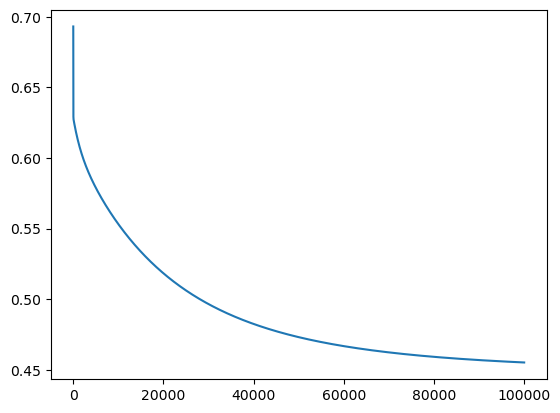

In [23]:
plt.plot(np.arange(ite),cost_list)
plt.show()

In [28]:
def accuracuy(x,y,w,b):
    z = np.dot(w.T,x)+b
    a = segmoid(z)
    a = a>0.5
    a= np.array(a,dtype = 'int64')
    acc = (1-np.sum(np.absolute(a-y))/y.shape[1])*100
    print('accuracy is :',round(acc,2),"%")

In [29]:
accuracuy(x_test,y_test,w,b)

accuracy is : 91.15 %
